In [2]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [3]:
(x_Train,y_Train),(x_Test,y_Test)=mnist.load_data()

In [4]:
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [5]:
x_Train4D_normalize=x_Train4D/255
x_Test4D_normalize=x_Test4D/255

In [6]:
y_TrainOneHot=np_utils.to_categorical(y_Train)
y_TestOneHot=np_utils.to_categorical(y_Test)

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [8]:
model=Sequential()

In [9]:
model.add(Conv2D(filters=16,
                kernel_size=(5,5),
                padding='same',
                input_shape=(28,28,1),
                activation='relu'))

In [10]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
model.add(Conv2D(filters=36,
               kernel_size=(5,5),
               padding='same',
               activation='relu'))

In [12]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [13]:
model.add(Dropout(0.25))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(128,activation='relu'))

In [16]:
model.add(Dropout(0.5))

In [17]:
model.add(Dense(10,activation='softmax'))

In [18]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [19]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',metrics=['acc'])

In [20]:
train_history=model.fit(x=x_Train4D_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=10,batch_size=300,verbose=2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 41s - loss: 0.4663 - acc: 0.8544 - val_loss: 0.1001 - val_acc: 0.9695
Epoch 2/10
 - 40s - loss: 0.1332 - acc: 0.9604 - val_loss: 0.0657 - val_acc: 0.9803
Epoch 3/10
 - 40s - loss: 0.0998 - acc: 0.9693 - val_loss: 0.0551 - val_acc: 0.9843
Epoch 4/10
 - 40s - loss: 0.0802 - acc: 0.9761 - val_loss: 0.0491 - val_acc: 0.9852
Epoch 5/10
 - 40s - loss: 0.0713 - acc: 0.9781 - val_loss: 0.0421 - val_acc: 0.9877
Epoch 6/10
 - 40s - loss: 0.0637 - acc: 0.9805 - val_loss: 0.0420 - val_acc: 0.9873
Epoch 7/10
 - 40s - loss: 0.0536 - acc: 0.9838 - val_loss: 0.0368 - val_acc: 0.9894
Epoch 8/10
 - 40s - loss: 0.0494 - acc: 0.9854 - val_loss: 0.0367 - val_acc: 0.9898
Epoch 9/10
 - 40s - loss: 0.0460 - acc: 0.9864 - val_loss: 0.0346 - val_acc: 0.9912
Epoch 10/10
 - 39s - loss: 0.0427 - acc: 0.9869 - val_loss: 0.0311 - val_acc: 0.9920


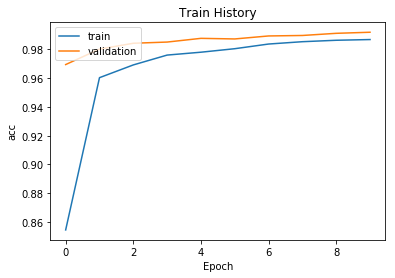

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()
show_train_history(train_history,'acc','val_acc')

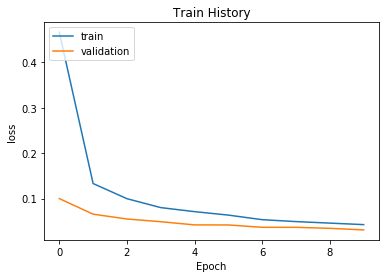

In [25]:
show_train_history(train_history,'loss','val_loss')

In [29]:
scores=model.evaluate(x_Test4D_normalize,y_TestOneHot)
scores[1]

10000/10000 [==============================] - 3s 250us/step


0.9911999702453613

In [34]:
prediction=model.predict_classes(x_Test4D_normalize)

In [32]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

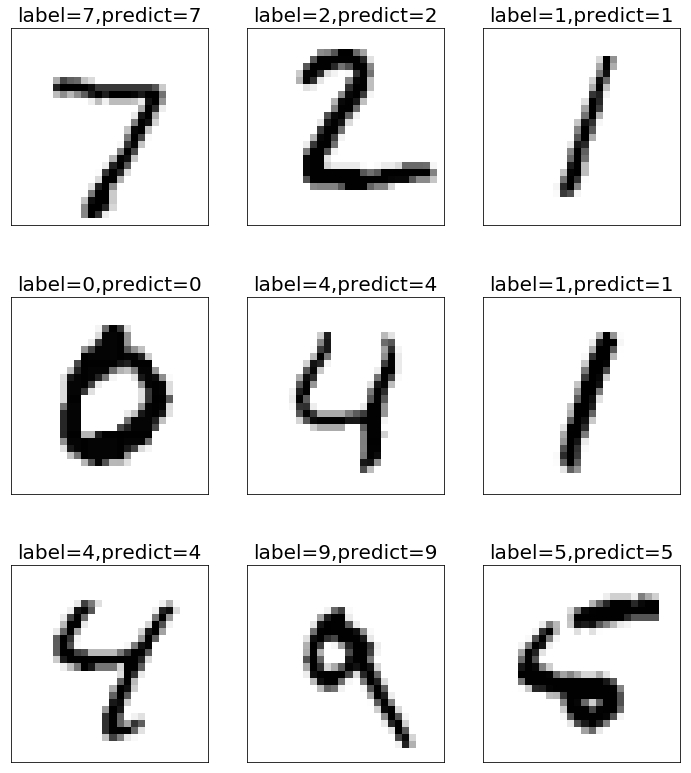

In [38]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=9):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:num=25
    for i in range(0,num):
        ax=plt.subplot(3,3,1+i)
        ax.imshow(images[idx],cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])
        ax.set_title(title,fontsize=20)
        ax.set_xticks([])
        ax.set_yticks([])
        idx+=1
    plt.show()
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

In [39]:
import pandas as pd
pd.crosstab(y_Test,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,0,0,0,0,0,2,1,2,0
1,0,1129,1,1,0,1,1,1,1,0
2,3,0,1026,1,0,0,0,1,1,0
3,0,0,1,1003,0,3,0,1,2,0
4,0,0,0,0,978,0,1,0,1,2
5,1,0,1,3,0,883,4,0,0,0
6,4,2,0,0,1,2,948,0,1,0
7,0,2,8,3,0,0,0,1013,1,1
8,1,0,0,1,0,0,0,0,971,1
